In [2]:
import numpy as np
import numpy.linalg as npl
import matplotlib.pyplot as plt

/Users/vb/anaconda3/lib/python3.7/site-packages/matplotlib/__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)
/Users/vb/anaconda3/lib/python3.7/site-packages/matplotlib/__init__.py:855: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/Users/vb/anaconda3/lib/python3.7/site-packages/matplotlib/__init__.py:947: UserWarning: could not find rc file; returning defaults
  warnings.warn(message)


# 4.1,2 Clustering & A Clustering Objective

1. "The goal of clustering is to group of partition vectors into k groups or clusters, with the vectors in each group close to each other"
2. Objective: A single value used to judge "choice of clustering": choose k

In [53]:
#given a tuple of vectors, and representatives for groups of vectors,
#what is the average distance each vector has from a representative

x = np.array([[0,1],[1,0],[-1,1]])
reps = np.array([[1,1],[0,0]])

jclust = lambda x, reps, assignment: np.average([npl.norm(x[i] - reps[assignment[i]])**2 for i in range(len(x))])
jclust(x,reps,[0,1,0]),jclust(x,reps,[0,0,1]) #assignments are 0 indexed

#How can we select the center-most (most minimal distance between vectors)
#representative?

(2.0, 1.3333333333333333)

# 4.3 k-Means Algorithm

"Iterating between choosing group representatives and choosing group assignments"

#### Pseduo:
1. Initialize a group of representatives either by: 1) randomly selecting from set of vectors, or 2) randomly group vectors and create mean vectors to be used as representatives.
2. Partition vectors in k amount of groups. Assign a group for every vector associated with the nearest representative.
    If there are any ties for vector assignments, choose the group with the smallest j value of the ties.
    If there is an empty group, remove from list of k groups.
    If there are two iterations without changes in vector assignments, stop algorithm.
3. Update representatives. For every group from 1-k set the corresponding representative to be the mean of the vectors in that group.
    If Jclust gets small, stop algorithm.

In [296]:
def kmeans(x,k,maxiters = 100, tolerance = 1e-4):
    
    N = len(x) #amount of vectors
    n = len(x[0]) #dimension of each vector
    distances = np.zeros(N) #stores distances of each pt to nearest rep
    progress = [] #used to visualize J updates
    jPrev = np.Infinity #placeholder for ending condition: 
                        #if previous J and current J haven't changed much,finish
    
    reps = [np.zeros(n) for j in range(k)] #stores representatives
    assignment = [np.random.randint(k) for i in range(N)] #intializes a random assignment of N integers between 0 and k
    
    for itr in range(maxiters):
        for j in range(k):
            group = [i for i in range(N) if assignment[i] == j]
            reps[j] = sum(x[group]/len(group))
        for i in range(N):
            #(distance and index):
            (distances[i], assignment[i]) = np.amin([npl.norm(x[i] - reps[j]) for j in range(k)]),[npl.norm(x[i] - reps[j]) for j in range(k)].index(np.amin([npl.norm(x[i] - reps[j]) for j in range(k)]))
        J = (npl.norm(distances)**2) / N
        progress.append([J,itr])
        print("Iteration " + str(itr) + ": Jclust = " + str(J)+".")
        if (itr > 1) and (abs(J-jPrev) < (tolerance * J)):
            return assignment, reps, progress
        
        jPrev = J  
    return assignment, reps, progress

In [297]:
X = np.concatenate(
    [[.3*np.random.randn(2) for i in range(100)],
     [np.array([1,1]) + .3*np.random.randn(2) for i in range(100)],
     [np.array([1,-1]) + .3*np.random.randn(2) for i in range(100)]]
)

((-1.5, 2.5), (-2, 2))

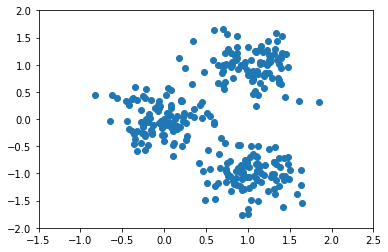

In [298]:
plt.scatter([x[0] for x in X],[x[1] for x in X])
plt.xlim([-1.5,2.5]),plt.ylim([-2,2])

In [300]:
k=2
assignment, reps, progress = kmeans(X,k)

Iteration 0: Jclust = 1.0231693716582628.
Iteration 1: Jclust = 0.5918779423265886.
Iteration 2: Jclust = 0.5278468679981483.
Iteration 3: Jclust = 0.5269656523989839.
Iteration 4: Jclust = 0.5269656523989839.


((-1.5, 2.5), (-2, 2))

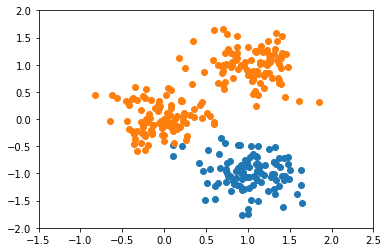

In [301]:
groups = [[X[i] for i in range(len(X)) if assignment[i] == j] for j in range(k)]
plt.scatter([c[0] for c in groups[0]],[c[1] for c in groups[0]])
plt.scatter([c[0] for c in groups[1]],[c[1] for c in groups[1]])
plt.xlim([-1.5,2.5]),plt.ylim([-2,2])

Iteration 0: Jclust = 0.9317054287555512.
Iteration 1: Jclust = 0.31389848409835014.
Iteration 2: Jclust = 0.17439737829953222.
Iteration 3: Jclust = 0.16861472349202722.
Iteration 4: Jclust = 0.16861472349202722.


((-1.5, 2.5), (-2, 2))

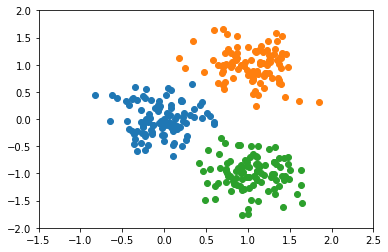

In [302]:
k=3
assignment, reps, progress = kmeans(X,k)
groups = [[X[i] for i in range(len(X)) if assignment[i] == j] for j in range(k)]
plt.scatter([c[0] for c in groups[0]],[c[1] for c in groups[0]])
plt.scatter([c[0] for c in groups[1]],[c[1] for c in groups[1]])
plt.scatter([c[0] for c in groups[2]],[c[1] for c in groups[2]])
plt.xlim([-1.5,2.5]),plt.ylim([-2,2])

Iteration 0: Jclust = 0.8987095782460353.
Iteration 1: Jclust = 0.1916676983729594.
Iteration 2: Jclust = 0.14917398347157398.
Iteration 3: Jclust = 0.14856605711398402.
Iteration 4: Jclust = 0.14847310770120947.
Iteration 5: Jclust = 0.14837893204001054.
Iteration 6: Jclust = 0.1483607928113771.
Iteration 7: Jclust = 0.1483607928113771.


((-1.5, 2.5), (-2, 2))

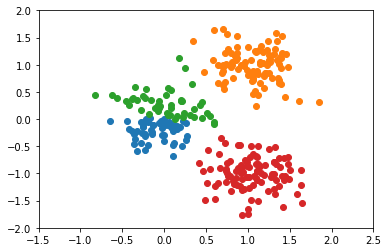

In [306]:
k=4
assignment, reps, progress = kmeans(X,k)
groups = [[X[i] for i in range(len(X)) if assignment[i] == j] for j in range(k)]
plt.scatter([c[0] for c in groups[0]],[c[1] for c in groups[0]])
plt.scatter([c[0] for c in groups[1]],[c[1] for c in groups[1]])
plt.scatter([c[0] for c in groups[2]],[c[1] for c in groups[2]])
plt.scatter([c[0] for c in groups[3]],[c[1] for c in groups[3]])
plt.xlim([-1.5,2.5]),plt.ylim([-2,2])
# plt.show()
# plt.scatter([i[1] for i in progress],[i[0] for i in progress])
# plt.show()

# 4.4 Examples

# 4.5 Applications